In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import image
from sklearn.cluster import SpectralClustering
from PIL import Image

from itertools import product

%matplotlib inline

In [2]:
MAX_PIXEL = 255
jpg = Image.open('corgi.jpg')
image_dim = (jpg.size[1], jpg.size[0])
image = np.array(jpg.getdata()).astype(np.float).reshape(*image_dim, 3) / MAX_PIXEL

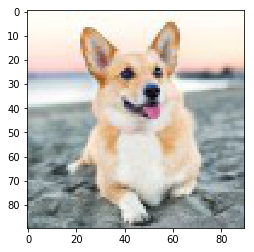

In [3]:
plt.imshow(image)

In [4]:
def image_features(image, image_dim, pixel_weight=1):
    features = image * pixel_weight
    xs = [x / image_dim[0] for x in range(image_dim[0])]
    ys = [y / image_dim[1] for y in range(image_dim[1])]
    pos = np.array(list(product(xs, ys))).reshape(*image_dim, 2)
    features = np.concatenate([features, pos], axis=2)
    return features

In [5]:
def spectral_clustering(image, image_dim, n_clusters, gamma=1, pixel_weight=1):
    X = image_features(image, image_dim, pixel_weight).reshape(-1, 5)
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='rbf', gamma=gamma)
    spectral.fit(X)
    labels = spectral.labels_.reshape(*image_dim)
    return labels

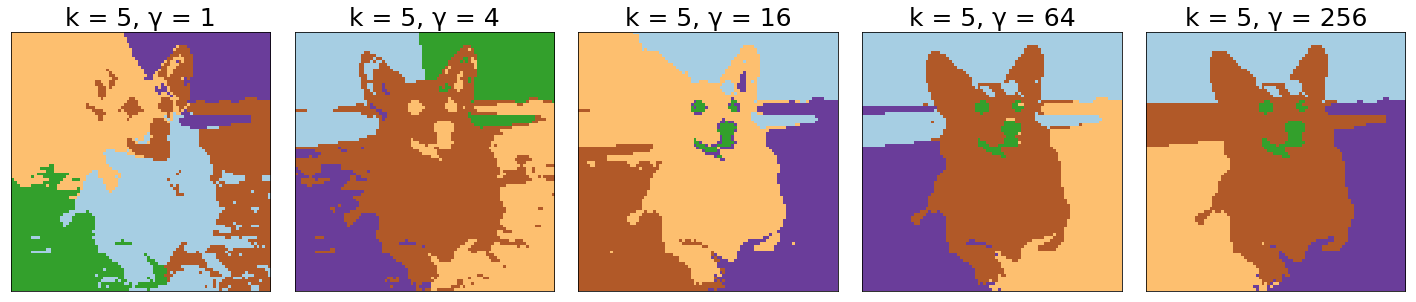

In [6]:
plot_num = 1
plt.figure(figsize=(20, 4))
plt.subplots_adjust(left=.01, right=.99, bottom=.05, top=.95, wspace=.03, hspace=.03)

for n_clusters in [5]:
    for gamma in [1, 4, 16, 64, 256]:
        sp = plt.subplot(1, 5, plot_num)
        plt.title('k = {}, γ = {}'.format(n_clusters, gamma), size=25)
        plt.xticks(())
        plt.yticks(())
        labels = spectral_clustering(image, image_dim, n_clusters, gamma)
        sp.imshow(labels, cmap='Paired')
        plot_num += 1

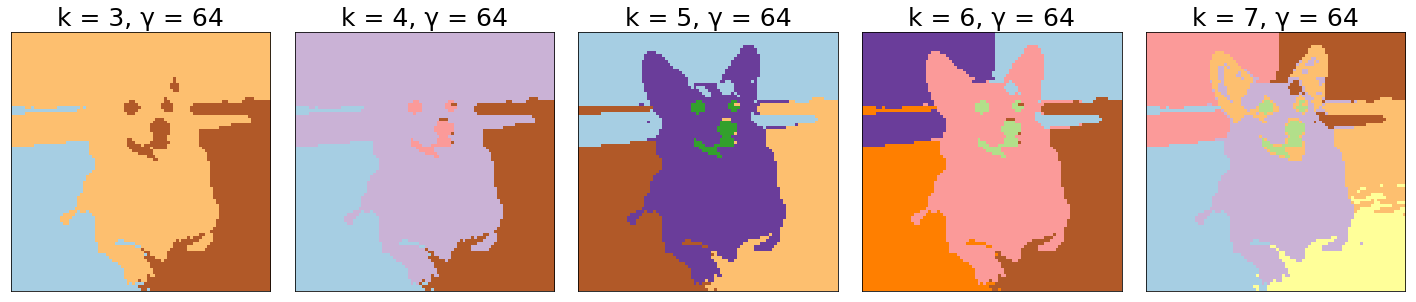

In [7]:
plot_num = 1
plt.figure(figsize=(20, 4))
plt.subplots_adjust(left=.01, right=.99, bottom=.05, top=.95, wspace=.03, hspace=.03)

for n_clusters in [3, 4, 5, 6, 7]:
    for gamma in [64]:
        sp = plt.subplot(1, 5, plot_num)
        plt.title('k = {}, γ = {}'.format(n_clusters, gamma), size=25)
        plt.xticks(())
        plt.yticks(())
        labels = spectral_clustering(image, image_dim, n_clusters, gamma)
        sp.imshow(labels, cmap='Paired')
        plot_num += 1